###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
def plot_perf(mdl, X, y):
    y_pred = mdl.predict(X)
    correct = (y_pred == y);
    tp = correct[y == 1]
    fn = ~tp
    tn = correct[y == 0]
    fp = ~tn
    err = (sum(fp) + sum(fn))/y_pred.shape[0]
    recall = sum(tp)/(sum(tp) + sum(fn))
    precision = sum(tp)/(sum(tp) + sum(fp))
    f1score = 2*(recall * precision)/(recall + precision)
    print("Accuracy: ", "%.2f" % (1 - err))
    print("Recall: ", "%.2f" % recall)
    print("Precision: ", "%.2f" % precision)
    print("F1 Score: ", "%.2f" % f1score)
    
    if X.shape[1] != 2:
        return
        
    X1 = X[y == 1,:]
    X0 = X[y == 0,:]
    plt.scatter(X1[tp, 0], X1[tp, 1], label = "True Positive", marker = '.',color = 'blue',linewidths = 3)
    plt.scatter(X0[tn, 0], X0[tn, 1], label = "True Negative", marker = '.',color = 'red',linewidths = 3)
    plt.scatter(X1[fn, 0], X1[fn, 1], label = "False Negative", marker = 'x',color = 'red',linewidths = 3)
    plt.scatter(X0[fp, 0], X0[fp, 1], label = "False Positive", marker = 'x',color = 'blue',linewidths = 3)
    nx, ny = 200, 200
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    obs = np.hstack((xx.reshape(nx*ny,1), yy.reshape(nx*ny,1)))
    # boundary
    plt.contour(xx, yy, mdl.predict_proba(obs)[:,0].reshape(xx.shape), [0.5], linewidths=2., colors='magenta')
    
    if (isinstance(mdl,LinearDiscriminantAnalysis)):
        # class 0 distribution
        p0 = multivariate_normal(mean=mdl.means_[0,:], cov=mdl.covariance_)
        plt.contour(xx, yy, p0.pdf(obs).reshape(xx.shape))
        # class 1 distribution
        p1 = multivariate_normal(mean=mdl.means_[1,:], cov=mdl.covariance_)
        plt.contour(xx, yy, p1.pdf(obs).reshape(xx.shape))
        # eigenvectors
        value,vector = np.linalg.eig(mdl.covariance_)
        uv = np.vstack((vector[:,0]*value[0],vector[:,1]*value[1]))
        xy = np.vstack((mdl.means_[0,:],mdl.means_[0,:]))
        plt.quiver(xy[:,0],xy[:,1],uv[:,0],uv[:,1])
        xy = np.vstack((mdl.means_[1,:],mdl.means_[1,:]))
        plt.quiver(xy[:,0],xy[:,1],uv[:,0],uv[:,1])

In [3]:
# Load data from mat file
data = loadmat('../../datasets/classification/ovarian.mat')
X = data['ovarianInputs'].T
X = X[:,0:2]
y = data['ovarianTargets'][0,:]
print("Positive Observations: ",(y == 1).sum())

Positive Observations:  121


In [4]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [5]:
# Train model
# mdl = QuadraticDiscriminantAnalysis()
mdl = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 0.5)
mdl.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.5,
                           solver='lsqr', store_covariance=False, tol=0.0001)

Accuracy:  0.88
Recall:  0.90
Precision:  0.88
F1 Score:  0.89


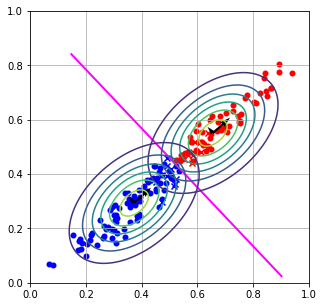

In [6]:
# Evaluate performance on the training set
plt.figure(figsize=(5,5))
plot_perf(mdl, X_train, y_train)
plt.xlim((0,1))
plt.ylim((0,1))
plt.grid()

Accuracy:  0.89
Recall:  0.90
Precision:  0.90
F1 Score:  0.90


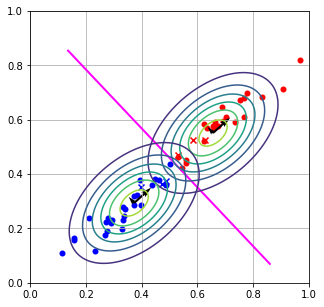

In [7]:
# Evaluate performance on the test set
plt.figure(figsize=(5,5))
plot_perf(mdl, X_test, y_test)
plt.xlim((0,1))
plt.ylim((0,1))
plt.grid()